In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from collections import Counter


'Link: http://varianceexplained.org/r/trump-tweets/'

'Link: http://varianceexplained.org/r/trump-tweets/'

In [61]:
tweets = pd.read_csv('trump_tweets_df.csv',encoding='latin1')
tweets.shape

(1512, 17)

In [4]:
tweets_android = tweets[tweets.statusSource.str.contains('android')]
tweets_iphone = tweets[tweets.statusSource.str.contains('iphone')]
tweets_android['created'] = pd.to_datetime(tweets_android['created'])
tweets_iphone['created'] = pd.to_datetime(tweets_iphone['created'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
tweets_android.retweetCount.mean(),tweets_iphone.retweetCount.mean()

(6262.1010498687665, 6648.1305732484079)

In [6]:
tweets_android.favoriteCount.mean(),tweets_iphone.favoriteCount.mean()

(19279.078740157482, 18285.004777070062)

In [7]:
tweets['created'] = pd.to_datetime(tweets['created'])

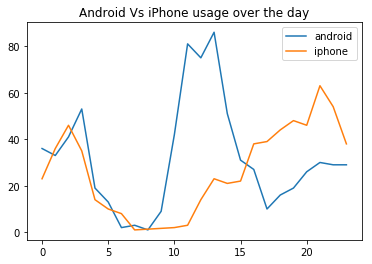

In [18]:
#Tweeter usage over the day between iphone and android

android = dict(Counter(np.array(tweets_android.created.dt.hour)))
iphone = dict(Counter(np.array(tweets_iphone.created.dt.hour)))

#sns.distplot(android,color='red',bins=24)
#sns.distplot(iphone,color='blue',bins=24)
#plt.hist(i,color='blue')

androidLists = sorted(android.items()) # sorted by key, return a list of tuples
iphoneLists = sorted(iphone.items())

androidX, androidY = zip(*androidLists) # unpack a list of pairs into two tuples
iphoneX, iphoneY = zip(*iphoneLists)

plt.plot(androidX, androidY)
plt.plot(iphoneX,iphoneY)
plt.title('Android Vs iPhone usage over the day')
plt.legend(['android','iphone'])
plt.show()

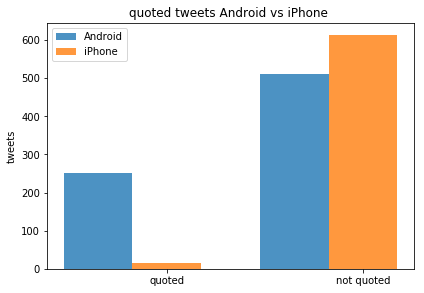

In [75]:
#android tweets
qat = tweets_android[tweets_android.text.str.contains('"')]
nqat = tweets_android[~tweets_android.text.str.contains('"')]
at = (len(qat),len(nqat))

#iphone tweets
qit = tweets_iphone[tweets_iphone.text.str.contains('"')]
nqit = tweets_iphone[~tweets_iphone.text.str.contains('"')]
it = (len(qit),len(nqit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('quoted', 'not quoted'))
plt.legend()
plt.tight_layout()
plt.title('quoted tweets Android vs iPhone ')
plt.show()


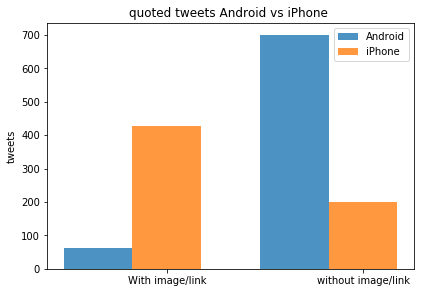

In [74]:
#android tweets
lat = tweets_android[tweets_android.text.str.contains('t.co')]
nlat = tweets_android[~tweets_android.text.str.contains('t.co')]
at = (len(lat),len(nlat))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains('t.co')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains('t.co')]
it = (len(lit),len(nlit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('With image/link', 'without image/link'))
plt.legend()
plt.tight_layout()
plt.title('quoted tweets Android vs iPhone ')
plt.show()